In [1]:
from src.config import config
from src.models import MPCTransformer
model_config = config['model']

model = MPCTransformer(**model_config)

/home/jannik/miniconda3/lib/python3.10/site-packages/jax/_src/api_util.py:190: SyntaxWarning: Jitted function has static_argnums=(0, 1, 9), but only accepts 8 positional arguments. This warning will be replaced by an error after 2022-08-20 at the earliest.
  warnings.warn(f"Jitted function has {argnums_name}={argnums}, "


In [5]:
from flax.training import train_state, checkpoints
import jax
from src.utils import get_model_output
from src.input_pipeline import create_dataset
from src.train import create_train_state

init_rng = {'params': jax.random.PRNGKey(0), 'dropout': jax.random.PRNGKey(1)}
state = create_train_state(model, 
                           init_rng, 
                           config['training']['learning_rate'], 
                           config['training']['momentum'])
del init_rng

CKPT_DIR = '../checkpoints/'
state = checkpoints.restore_checkpoint(ckpt_dir=CKPT_DIR, target=state)

100%|██████████| 316/316 [17:36<00:00,  3.34s/it]


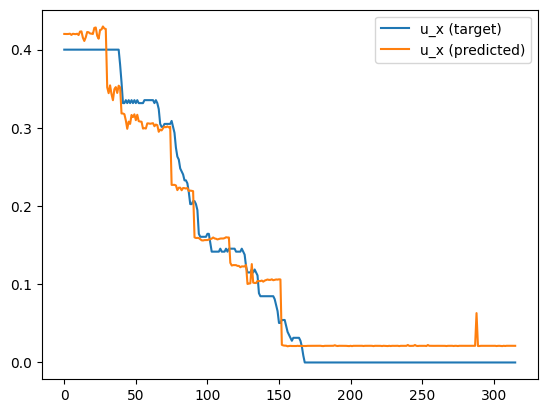

: 

In [8]:
from src.input_pipeline import create_dataset
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt

dataset = create_dataset()
indices = range(len(dataset))

commands = get_model_output(model, state, dataset, indices)

plt.plot(commands['target'], label='u_x (target)')
plt.plot(commands['pred'], label='u_x (predicted)')
plt.legend()
plt.show() 